# Is Ask HN or Show HN getting more attention?

In this project, we will explore data from Hacker News (HN) site. HK is a popular technology sites for users to ask/answer questions or show their finding of interests. The submissions from users are called posts which  can be categorized in three types:
- Ask HN: users post questions to Hacker News community
- Show HN: users post their projects, findings, etc.
- Other posts

Users can upvote (like) or downvote (dislike) a post.<br>
A post can have multiple comments.<br>
We will just focus on Ask HN or Post HN to find out which one is more likely to get attention from users. To do that, we will find the answers for:
- Which type of posts receive more comments on average?
- Do posts created at a certain time receive more comments on average?

**Results:**
- On average, ask posts get more comments than show posts.
- Interestingly, posts are likely to get more comments when posted at 3PM. 

In [1]:
# Read in file hacker_news.csv
import pandas as pd # using panda lib
hn = pd.read_csv('hacker_news.csv') # read dataset as DataFrame
print('Number of rows: ', hn.shape[0])
hn.head() # display first 5 rows

Number of rows:  20100


,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,1/26/2016 19:30
2,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
3,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
4,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12


**title** column shows title of the post. Posts start with:
- ask hn: is considered a question
- show hn: is to share information

## Find average number of comments

In [2]:
# isolate Ask Posts
ask = hn[hn['title']
            .str.lower() # convert to lowercase
            .str.startswith('ask hn')].copy() # filter posts start with ask hn

In [3]:
# find average number of comments in ask posts
ask['num_comments'].mean()

14.038417431192661

In [4]:
# isolate Show Posts
show = hn[hn['title']
            .str.lower() # convert to lowercase
            .str.startswith('show hn')] # filter posts start with show hn

In [5]:
show['num_comments'].mean()

10.31669535283993

On average, Ask posts are likely to receive comments. We will check if posting a question on a specific timeframe will increase our chance to get more comments.

## Find the number of Ask Posts and Comments by Hour Created
Next, we will need to work with created_at column to find out at which time in the day, a new question (ask post) will get more comments.

In [6]:
import datetime as dt
# convert created_at col to datetime format
ask_datetime = pd.to_datetime(ask['created_at'])

In [7]:
# split date to new column: created_date
ask['created_date'] = ask_datetime.dt.strftime('%Y-%m-%d')

In [8]:
# split time to new column: created_time
ask['created_time'] = ask_datetime.dt.strftime('%H:%M')

In [9]:
# split hour to new column: created_hour
ask['created_hour'] = ask_datetime.dt.strftime('%H')

In [10]:
ask.head(3)

,id,title,url,num_points,num_comments,author,created_at,created_date,created_time,created_hour
7,12296411,Ask HN: How to improve my personal website?,NaN,2,6,ahmedbaracat,8/16/2016 9:55,2016-08-16,09:55,09
17,10610020,Ask HN: Am I the only one outraged by Twitter ...,NaN,28,29,tkfx,11/22/2015 13:43,2015-11-22,13:43,13
22,11610310,Ask HN: Aby recent changes to CSS that broke m...,NaN,1,1,polskibus,5/2/2016 10:14,2016-05-02,10:14,10


In [11]:
# create function to filter posts by hour
def posts_by_hour(dataframe):
    # group ask posts by hour
    by_hour = dataframe.groupby('created_hour')['num_comments'].agg(
                                    ['sum','count','mean'])
    by_hour.rename(columns = 
                       {'sum':'total_comments','count':'total_posts',
                           'mean':'average_comments'},
                       inplace = True)
    by_hour.reset_index(inplace = True)
    return by_hour

In [12]:
# rename columns
ask_by_hour = posts_by_hour(ask)
ask_by_hour

,created_hour,total_comments,total_posts,average_comments
0,00,447,55,8.127273
1,01,683,60,11.383333
2,02,1381,58,23.810345
3,03,421,54,7.796296
4,04,337,47,7.170213
5,05,464,46,10.086957
6,06,397,44,9.022727
7,07,267,34,7.852941
8,08,492,48,10.250000
9,09,251,45,5.577778


### Visualize the distributions of posts and comments by hours

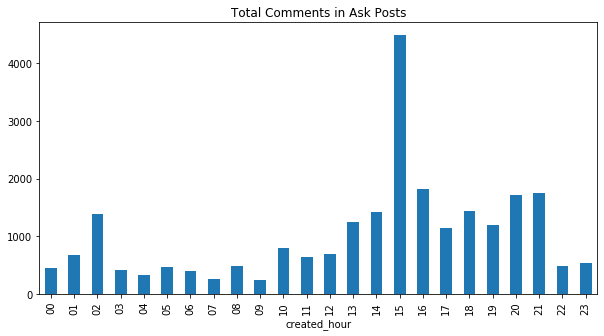

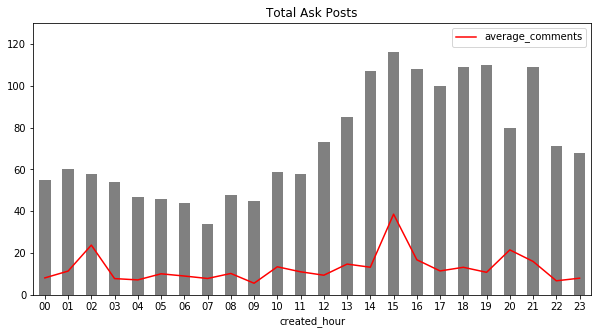

In [13]:
import matplotlib.pyplot as plt
ax1 = ask_by_hour.plot.bar(
    x = 'created_hour',
    y = 'total_comments', legend = False, figsize = (10,5),
    title = 'Total Comments in Ask Posts')
ax2 = ask_by_hour.plot.bar(
    x = 'created_hour',
    y = 'total_posts', color='gray', legend = False, figsize = (10,5),
    title = 'Total Ask Posts')
ax3 = ask_by_hour.plot.line(x='created_hour', y = 'average_comments',
                            ax = ax2, color = 'red')
ax2.set_ylim(0,130)
plt.show()

The charts show the number of posts and comments are peak at 15 hour. The average number of comments is also highest at 15 hour. It means a post created at 15 hour (3 PM) is likely to get more comments. <br>

However, is it true that any ask post created within that hour will get more comments?<br>

We need to rely on the num_points to clear this curiosity. num_points is calculated by taking the total number of upvotes minus the total number of downvots. A post with higher num_points possibly means an interesting question.

In [14]:
# isolate ask posts created at 15 hour
ask_15 = ask[ask['created_hour']=='15'][['num_points','num_comments']]

In [15]:
# find correlation between num_comments and num_points
correlation = ask_15.corr()['num_comments']['num_points']
correlation

0.9284281436151685

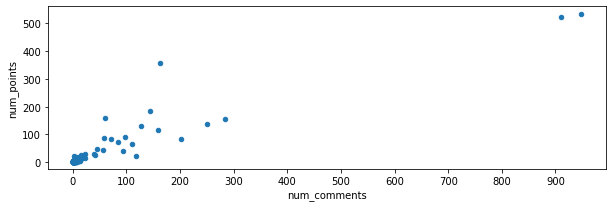

In [16]:
# visualize the correlation on scatter plot
import numpy as np
ask_15.plot.scatter(x='num_comments', y='num_points', figsize=(10,3))
plt.xticks(np.arange(0,1000,100))
plt.show()

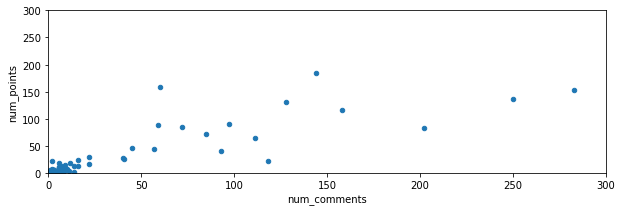

In [17]:
# remove the two posts with significant high number of points and comments
ask_15.plot.scatter(x='num_comments', y='num_points', figsize=(10,3))
plt.xlim(0,300)
plt.ylim(0,300)
plt.show()

num_points and num_comments has correlation of approximately 0.93. In general, a post with higher comments tend to have higher points. One thing to notice is two post with more than 900 comments, it is probably the factors make this hour standout from the others.<br>

### What if removing extremely high number of comments posts?

In [18]:
# check number of posts having more than 100 comments in ask posts
print('Total number of ask posts :', ask.shape[0])
print('Total number of ask posts more than 100 comments: ',ask[ask['num_comments']>100].shape[0])

Total number of ask posts : 1744
Total number of ask posts more than 100 comments:  41


Only 41 ask posts having more than 100 comments, we will filter these posts out to see if the pattern at 15 hour is still maintained.

In [19]:
ask_100_less = ask[ask['num_comments']<=100]

In [20]:
# call functions to filter posts by hour
ask_100_less_by_hour = posts_by_hour(ask_100_less)

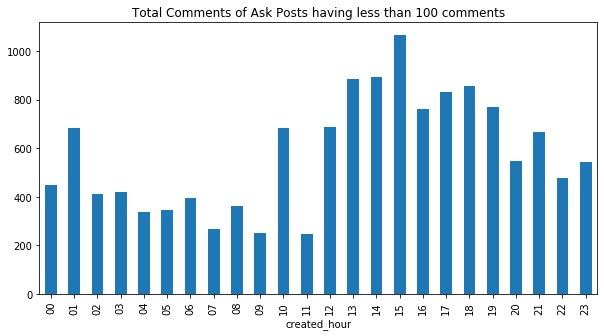

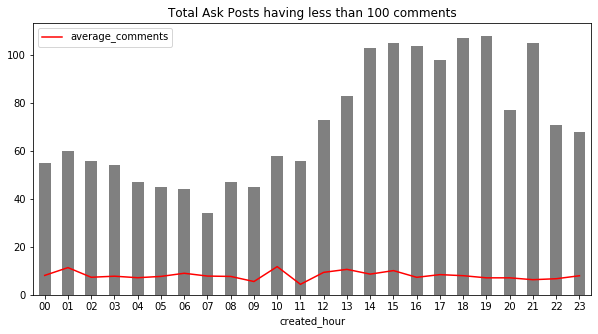

In [21]:
import matplotlib.pyplot as plt
ax1 = ask_100_less_by_hour.plot.bar(
    x = 'created_hour',
    y = 'total_comments', legend = False, figsize = (10,5),
    title = 'Total Comments of Ask Posts having less than 100 comments')
ax2 = ask_100_less_by_hour.plot.bar(
    x = 'created_hour',
    y = 'total_posts', color='gray', legend = False, figsize = (10,5),
    title = 'Total Ask Posts having less than 100 comments')
ax3 = ask_100_less_by_hour.plot.line(x='created_hour', y = 'average_comments',
                            ax = ax2, color = 'red')

plt.show()

After removing posts with more than 100 comments, we still see the pattern repeated in the total numbers of comments. However, on average, posts at 10 receiving more comments. Timing clearly showed the difference in the number of comments, but it is not the only contributing factor. As we saw with the correlation with number of points. A post with more points tends to have more comments or vice versa.

# Conclusion
The goal of this project is to find out where ask posts or show posts are getting more attention from Hacker News community. We also want to know whether a post created at a specific time is likely to get more comments.<br>

On average, ask posts have higher average number of comments than show posts. While ask post type has 14 comments on average, show post type has only 10. We decided to move further with Ask Posts.<br>

Then, we found out that a post created at 3PM getting having average of  at least double number of comments comparing to other timeframes. <br>

When we dig deeper by filter out posts with more than 100 comments, the the pattern we found for posts at 3PM is still remained when consider the total number of comments. However, on average, posts at 10 took over the highest number.<br>

Last but not least, we saw a strong positive relationship between number of points and number of comments. It means that timing is not only the contributing factor, but may also depend on the type of questions.